## OpenCV 임계점 처리하기
[강의 노트](https://github.com/ndb796/Python-Data-Analysis-and-Image-Processing-Tutorial/blob/master/10.%20OpenCV%20%EC%9E%84%EA%B3%84%EC%A0%90%20%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0/Python%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%EA%B3%BC%20%EC%9D%B4%EB%AF%B8%EC%A7%80%20%EC%B2%98%EB%A6%AC%20-%20OpenCV%20%EC%9E%84%EA%B3%84%EC%A0%90%20%EC%B2%98%EB%A6%AC%ED%95%98%EA%B8%B0.pdf)


### cv2.threshold(image, thresh, max_value, type): 임계값을 기준으로 흑/백으로 분류하는 함수

- image: 처리할 Gray Scale 이미지
- thresh: 임계 값 (전체 픽셀에 적용)
- max_value: 임계 값을 넘었을 때 적용할 값
- type: 임계점을 처리하는 방식

1) THRESH_BINARY: 임계 값보다 크면 max_value, 작으면 0

2) THRESH_BINARY_INV: 임계 값보다 작으면 max_value, 크면 0

3) THRESH_TRUNC: 임계 값보다 크면 임계 값, 작으면 그대로

4) THRESH_TOZERO: 임계 값보다 크면 그대로, 작으면 0

5) THRESH_TOZERO_INV: 임계 값보다 크면 0, 작으면 그대로

In [3]:
import cv2
import matplotlib.pyplot as plt

In [12]:
image = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)  # 이미지 흑백화

images = []
threshold = ['cv2.THRESH_BINARY (127보다 크면 255(흰색)으로, 아니면 0(검정색)으로 )', 
             'cv2.THRESH_BINARY_INV (색 127보다 크면 0(검정색)으로, 아니면  255(흰색)으로)', 
             'cv2.THRESH_TRUNC (127보다 크면 255(흰색) 지정, 작으면 기존값 그대로.)', 
             'cv2.THRESH_TOZERO (127보다 크면 그대로, 작으면 0(검정색)으로.)', 
             'cv2.THRESH_TOZERO_INV (127보다 크면  0(검정색)으로, 작으면 그대로)']
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)  # 색 127보다 크면 255(흰색)으로, 아니면 0(검정색)으로 
ret, thres2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)  # 색 127보다 크면 0(검정색)으로, 아니면  255(흰색)으로   
ret, thres3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)  # 색 127보다 크면 255(흰색) 지정, 작으면 기존값 그대로.  
ret, thres4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)  # 색 127보다 크면 그대로, 작으면 0(검정색)으로. 
ret, thres5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)  # 색 127보다 크면  0(검정색)으로, 작으면 그대로.   

cv2.THRESH_BINARY (127보다 크면 255(흰색)으로, 아니면 0(검정색)으로 )


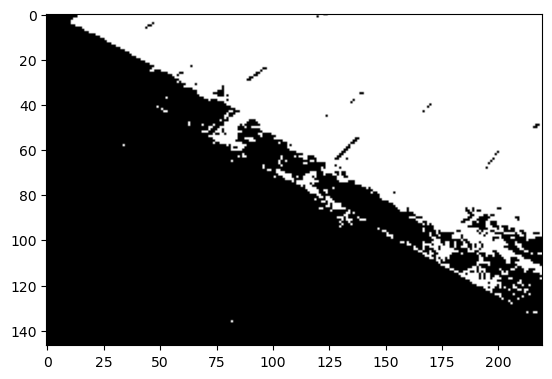

cv2.THRESH_BINARY_INV (색 127보다 크면 0(검정색)으로, 아니면  255(흰색)으로)


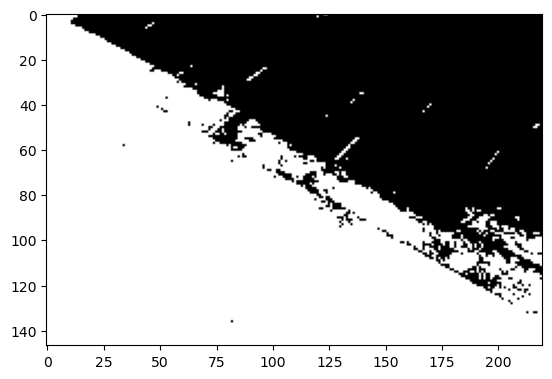

cv2.THRESH_TRUNC (127보다 크면 255(흰색) 지정, 작으면 기존값 그대로.)


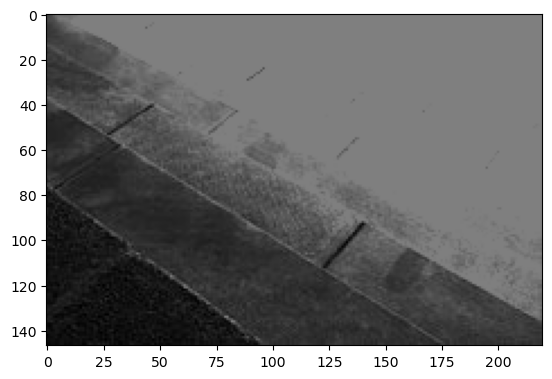

cv2.THRESH_TOZERO (127보다 크면 그대로, 작으면 0(검정색)으로.)


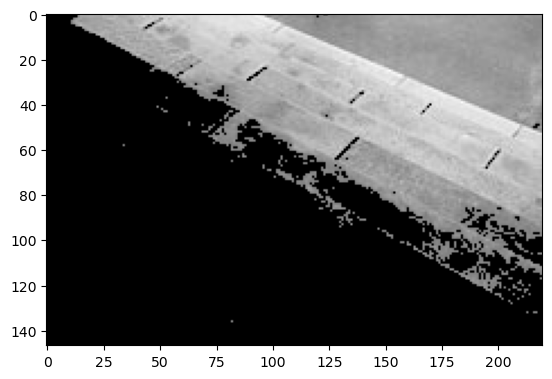

cv2.THRESH_TOZERO_INV (127보다 크면  0(검정색)으로, 작으면 그대로)


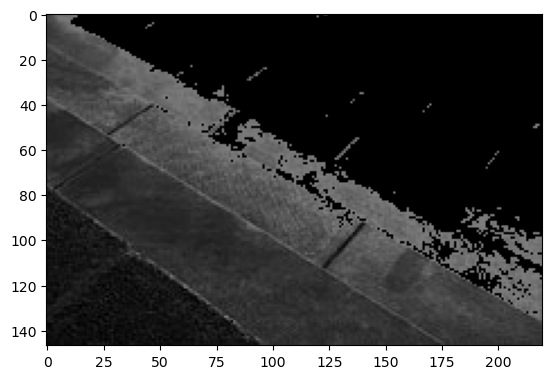

In [13]:
images.append(thres1)
images.append(thres2)
images.append(thres3)
images.append(thres4)
images.append(thres5)

# for i in images:
#   plt.imshow(cv2.cvtColor(i, cv2.COLOR_GRAY2RGB))
#   plt.show()

for i, thres in enumerate(threshold):
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_GRAY2RGB))  # gray로 표현할 걸 굳이 다시 RGB로 바꾸는 이유는 matplot이 RGB만 받기 때문.
    print(thres)
    plt.show()

### cv2.adaptiveThreshold(image, max_value, adaptive_method, type, block_size, C): 적응 임계점 처리 함수

하나의 이미지에 다수의 조명 상태가 존재하는 경우 적용하면 좋습니다.

- max_value: 임계 값을 넘었을 때 적용할 값

- adaptive_method: 임계 값을 결정하는 계산 방법

1) ADAPTIVE_THRESH_MEAN_C: 주변영역의 평균값으로 결정

2) ADAPTIVE_THRESH_GAUSSIAN_C

- type: 임계점을 처리하는 방식

- block_size: 임계 값을 적용할 영역의 크기

- C: 평균이나 가중 평균에서 차감할 값

Adaptive Threshold를 이용하면, 전체 픽셀을 기준으로 임계 값을 적용하지 않습니다.

In [19]:
import cv2

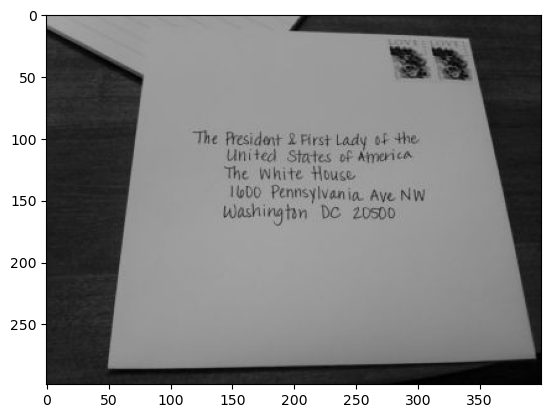

In [20]:
# 1. 원본 흑백
image = cv2.imread('hand_writing_image.jpg', cv2.IMREAD_GRAYSCALE)  
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))  # 1. 원본 흑백
plt.show()

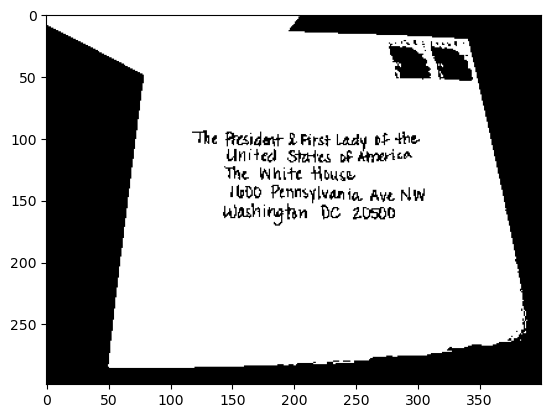

In [21]:
# 2. cv2.THRESH_BINARY 방식 임계점 처리
ret, thres1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)   
plt.imshow(cv2.cvtColor(thres1, cv2.COLOR_GRAY2RGB)) 
plt.show()

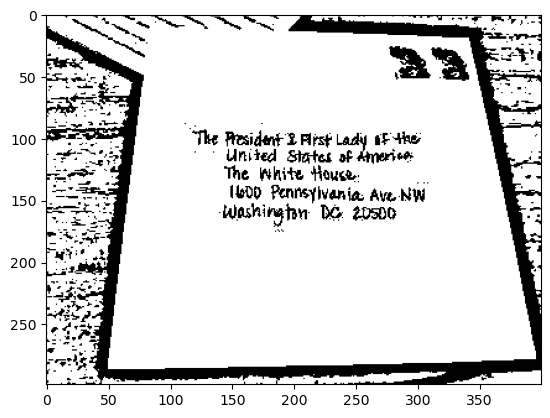

In [27]:
# 3. 적응 임계점 처리
#          cv2.adaptiveThreshold(  image,   max_value,          adaptive_method,                          type,              block_size,    C)
thres2 = cv2.adaptiveThreshold(  image,      255,        cv2.ADAPTIVE_THRESH_MEAN_C,    cv2.THRESH_BINARY,        21,         3)
plt.imshow(cv2.cvtColor(thres2, cv2.COLOR_GRAY2RGB))   # 3. cv2.adaptiveThreshold 적응 임계점 처리
plt.show()